In [1]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
import gp
importlib.reload(gp)
from gp import *
import pandas as pd


In [2]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


In [3]:
funcdict = {
	'add' : 5,
	'sub' : 5,
	'mul' : 4,
	'div' : 3,
	'inv' : 0,
	'log' : 3,
	'max' : 0,
	'min' : 0,
	'sqrt' : 2,
	'exp' : 2,
	'floor': 2
}

gp = GP(M=500, max_depth=50, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
res = gp.execute(x,y, generations=50)
res

c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:18: RuntimeWarning: overflow encountered in exp
  return self.operator(*args)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:18: RuntimeWarning: overflow encountered in multiply
  return self.operator(*args)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:33: RuntimeWarning: overflow encountered in divide
  return np.where(np.abs(x2) > INV_THRESHOLD, x1/x2, x1)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:18: RuntimeWarning: invalid value encountered in multiply
  return self.operator(*args)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\gp.py:11: RuntimeWarning: overflow encountered in power
  return np.average(np.power(y-y_pred,2), weights=w)
Progress:  34%|███▍      | 17/50 [00:18<00:33,  1.03s/it]c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:23: RuntimeW

{'total_generations': 50,
 'best_trees': array([Node(sub), Node(mul), Node(mul), Node(mul), Node(mul), Node(mul),
        Node(mul), Node(mul), Node(mul), Node(mul), Node(mul), Node(mul),
        Node(mul), Node(mul), Node(mul), Node(mul), Node(mul), Node(mul),
        Node(mul), Node(mul), Node(mul), Node(mul), Node(mul), Node(mul),
        Node(mul), Node(mul), Node(mul), Node(mul), Node(mul), Node(mul),
        Node(mul), Node(mul), Node(mul), Node(mul), Node(mul), Node(mul),
        Node(mul), Node(mul), Node(mul), Node(mul), Node(mul), Node(mul),
        Node(mul), Node(mul), Node(mul), Node(mul), Node(mul), Node(mul),
        Node(mul), Node(mul), Node(mul)], dtype=object),
 'best_fitness': array([         nan, 174.34719144, 174.34719144, 174.34719144,
        174.34719144, 174.34719144, 174.34719144, 174.34719144,
        174.34719144, 174.34719144, 174.34719144, 174.34719144,
        174.34719144, 174.34719144, 174.34719144, 174.34719144,
        174.34719144, 174.34719144, 174

In [4]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness penalizado:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	174.3471914408632
best fitness penalizado:	175.2189273980675


In [5]:
#res["best_trees"][-1].sympify_str()

In [6]:
(res["best_trees"][-1]).pprint()


  mul_________
 /            \
x     0.09895917263215304



In [7]:
#arbol = "div(x,log(sub(mul(div(inv(log(inv(log(0.4981859242141673)))),mul(inv(log(0.4981859242141673)),log(log(inv(0.4981859242141673))))),log(x)),div(x,div(inv(log(inv(0.4981859242141673))),mul(inv(log(inv(0.4981859242141673))),log(0.7107532914770232)))))))"
#sympy.sympify(arbol,locals=SYMPY_FUNC_CONVERTER)
#arbol.sympify_str()

In [ ]:
print(res['best_trees'][-1])

mul(x,0.09895917263215304)


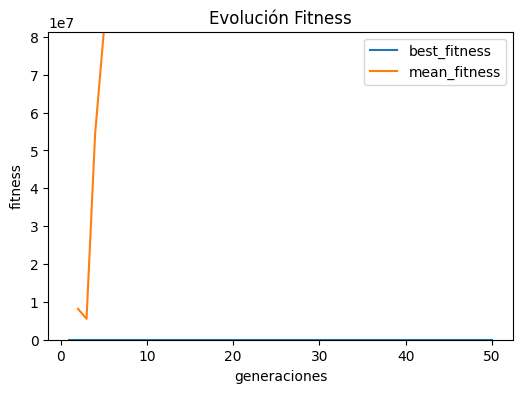

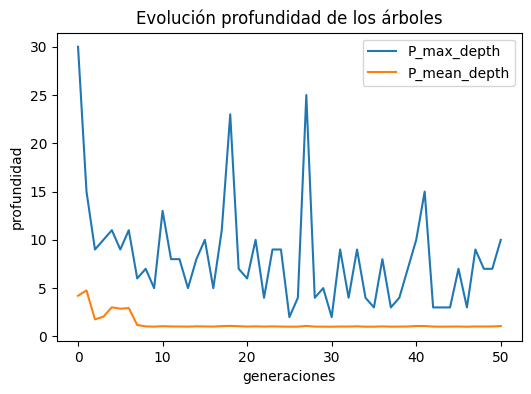

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.ylim(0,res['mean_fitness'][5])
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()